In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval

In [2]:
my_file_name = "D:/DatasetsVault/spotify/tracks_preprocessing.csv"
cleaned_file_name  = "D:/DatasetsVault/spotify/tracks_preprocessing.csv"

with open(my_file_name, 'r', encoding="utf8") as inp:
    lines = inp.readlines()

with open(cleaned_file_name, 'w', encoding="utf8") as out:
    for line in lines:
        if not 'Various Artists' in line and  not "0LyfQWJT6nXafLPZqxe9Of" in line:
            out.write(line)

In [3]:
data_tracks = pd.read_csv("D:/DatasetsVault/spotify/tracks_preprocessing.csv")
data_artists = pd.read_csv("D:/DatasetsVault/spotify/artists_preprocessing.csv")

In [4]:
data_tracks["id_artists"] = data_tracks["id_artists"].apply(literal_eval)

In [5]:
data_artists.set_index("id", inplace=True)

# Preprocesamiento

La estructura general del preprocesamiento es:

1. Revisar estructura digital del dataset
2. El tipo de información de cada variable (Dataseries)
3. Plantear reglas para la definción de valores atípicos

In [6]:
data_tracks.shape

(586279, 20)

In [7]:
type(data_tracks)

pandas.core.frame.DataFrame

In [8]:
type(data_tracks.explicit)

pandas.core.series.Series

In [9]:
data_tracks.info

<bound method DataFrame.info of                             id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586274  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586275  0NuWgxEp51CutD2pJoF4OM                                blind   
586276  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586277  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586278  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903      

In [10]:
data_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586279 entries, 0 to 586278
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586279 non-null  object 
 1   name              586279 non-null  object 
 2   popularity        586279 non-null  int64  
 3   duration_ms       586279 non-null  int64  
 4   explicit          586279 non-null  int64  
 5   artists           586279 non-null  object 
 6   id_artists        586279 non-null  object 
 7   release_date      586279 non-null  object 
 8   danceability      586279 non-null  float64
 9   energy            586279 non-null  float64
 10  key               586279 non-null  int64  
 11  loudness          586279 non-null  float64
 12  mode              586279 non-null  int64  
 13  speechiness       586279 non-null  float64
 14  acousticness      586279 non-null  float64
 15  instrumentalness  586279 non-null  float64
 16  liveness          58

In [11]:
type(data_tracks["duration_ms"])

pandas.core.series.Series

In [12]:
data_tracks[["valence", "tempo"]]

,valence,tempo
0,0.1270,104.851
1,0.6550,102.009
2,0.4570,130.418
3,0.3970,169.980
4,0.1960,103.220
...,...,...
586274,0.2110,131.896
586275,0.6860,150.091
586276,0.0663,145.095
586277,0.4380,90.029


In [13]:
data_tracks.loc[:,"valence"]

0         0.1270
1         0.6550
2         0.4570
3         0.3970
4         0.1960
           ...  
586274    0.2110
586275    0.6860
586276    0.0663
586277    0.4380
586278    0.9750
Name: valence, Length: 586279, dtype: float64

In [14]:
data_tracks.iloc[:, 4]

0         0
1         0
2         0
3         0
4         0
         ..
586274    0
586275    0
586276    0
586277    0
586278    0
Name: explicit, Length: 586279, dtype: int64

In [15]:
data_tracks.iloc[:, 2:4]

,popularity,duration_ms
0,6,126903
1,0,98200
2,0,181640
3,0,176907
4,0,163080
...,...,...
586274,50,258267
586275,72,153293
586276,70,187601
586277,58,142003


In [16]:
data_tracks.isna().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [17]:
data_tracks[data_tracks["name"].isna()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [18]:
data_tracks.sort_values("duration_ms")

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1440,2s6e7KLoQ5hie3Cnh73v2v,Pause Track,0,3344,0,['Louis Armstrong'],[19eLuQmk9aCobbVDHc6eek],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.000,0.000,0.000,0.000,0
1569,4SjlyAejCNUB4MrGM1KuVp,Pause Track,0,3344,0,['Louis Armstrong'],[19eLuQmk9aCobbVDHc6eek],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.000,0.000,0.000,0.000,0
1574,4WeyR22Ax2fF9dY0NxgjFV,Pause Track,0,3344,0,['Louis Armstrong'],[19eLuQmk9aCobbVDHc6eek],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.000,0.000,0.000,0.000,0
1619,52qf3kN9pExTlHdSlh3ZeR,Pause Track,0,3344,0,['Louis Armstrong'],[19eLuQmk9aCobbVDHc6eek],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.000,0.000,0.000,0.000,0
1290,1JUFU8XJRWgG9Ir8KlLvpW,Pause Track,0,4000,0,['Louis Armstrong'],[19eLuQmk9aCobbVDHc6eek],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.000,0.000,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83481,28ci4OQnXnVyOJJjqNTza1,6 Years of 1980 Recordings - Part 2 - 2010-201...,0,4800118,0,['Dan McKie'],[5x6OZlUVGFX4F1QHJCgysn],2013-01-28,0.751,0.807000,7,-7.129,1,0.0510,0.00257,0.519,0.102,0.190,127.006,4
399236,7r86YmJo79FRcAHuVeKZp8,Tech House The Yearbook 2018 - Continuous Mix 2,0,4864333,0,['Monoteque'],[1w3ov1Em1iYnTpAh3pIbOf],2018-12-16,0.691,0.639000,1,-10.181,1,0.0486,0.00424,0.721,0.116,0.157,124.545,4
586064,7jTxNjSwPcPjSbK8829Vno,Surah Al-Araf,39,4995083,0,['Sheikh Mishary Rashid Alfasay'],[6nd2oiKSu9ksEAMzpXjIyi],2010-01-01,0.426,0.249000,11,-7.202,1,0.0301,0.91000,0.000,0.143,0.400,134.168,3
449989,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,5403500,0,['Sound Dreamer'],[4YJlpG8fCq38GnS8ElByiF],2013-06-05,0.000,0.000099,2,-21.669,1,0.0000,0.11100,0.392,0.137,0.000,0.000,0


In [19]:
data_tracks[data_tracks["duration_ms"]>30000].sort_values("duration_ms")

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
381191,4QI85wXOWi6YjuIPzqW0Nw,Little Something - Super8 & Tab Remix Mix Cut,2,30013,0,"['Above & Beyond', 'Tranquility Base', 'Justin...","[10gzBoINW3cLJfZUka8Zoe, 4u2OHlzl2kRnU2FSUrLLx...",2016-12-16,0.499,0.936000,6,-6.517,1,0.0981,0.000025,0.0051,0.315,0.385,128.059,4
89501,6wlvYZ2THeKzH2i2oQnfL7,Little Something (Mix Cut) - Super8 & Tab Remix,9,30013,0,"['Above & Beyond', 'Justine Suissa', 'Super8 &...","[10gzBoINW3cLJfZUka8Zoe, 6UKSvQC8EQZUOKtUaj5uC...",2016-12-16,0.499,0.936000,6,-6.517,1,0.0981,0.000025,0.0051,0.315,0.385,128.059,4
304484,5PdhyqtTUvJHf1elMXqntI,Pegasus (Mix Cut) - Original Mix,4,30016,0,['Protoculture'],[37kQjANSQM1tmkTwvB5M96],2015-12-18,0.404,0.961000,10,-7.525,0,0.0425,0.000088,0.9150,0.380,0.611,127.989,4
131682,3HsHEL0y7NmcScTp31b6EZ,New Years Eve Ultimate Countdown 2014 Female V...,0,30023,0,['DJ X-Change'],[6ZFdIGUXMQXUTqeYqbwxFV],2013-12-10,0.635,0.317000,7,-10.353,0,0.4120,0.750000,0.0000,0.303,0.611,107.913,4
131686,3QKYXMSmr4TnnwoouB6SO9,New Years Eve Ultimate Countdown 2014 Robotic ...,0,30023,0,['DJ X-Change'],[6ZFdIGUXMQXUTqeYqbwxFV],2013-12-10,0.447,0.608000,0,-11.045,1,0.0707,0.992000,0.5900,0.291,0.257,67.424,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83481,28ci4OQnXnVyOJJjqNTza1,6 Years of 1980 Recordings - Part 2 - 2010-201...,0,4800118,0,['Dan McKie'],[5x6OZlUVGFX4F1QHJCgysn],2013-01-28,0.751,0.807000,7,-7.129,1,0.0510,0.002570,0.5190,0.102,0.190,127.006,4
399236,7r86YmJo79FRcAHuVeKZp8,Tech House The Yearbook 2018 - Continuous Mix 2,0,4864333,0,['Monoteque'],[1w3ov1Em1iYnTpAh3pIbOf],2018-12-16,0.691,0.639000,1,-10.181,1,0.0486,0.004240,0.7210,0.116,0.157,124.545,4
586064,7jTxNjSwPcPjSbK8829Vno,Surah Al-Araf,39,4995083,0,['Sheikh Mishary Rashid Alfasay'],[6nd2oiKSu9ksEAMzpXjIyi],2010-01-01,0.426,0.249000,11,-7.202,1,0.0301,0.910000,0.0000,0.143,0.400,134.168,3
449989,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,5403500,0,['Sound Dreamer'],[4YJlpG8fCq38GnS8ElByiF],2013-06-05,0.000,0.000099,2,-21.669,1,0.0000,0.111000,0.3920,0.137,0.000,0.000,0


In [20]:
data_tracks1 = data_tracks.copy()

In [21]:
data_tracks.dropna(inplace=True)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

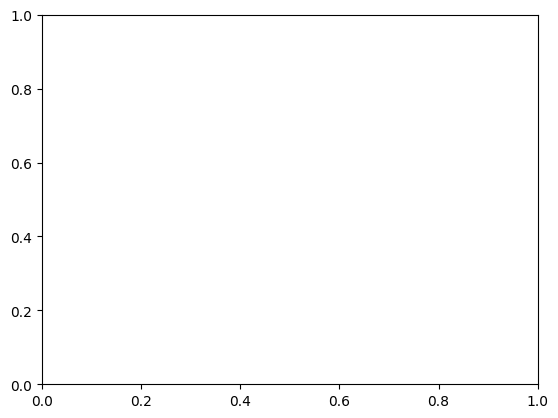

In [23]:
# Crear el lienzo donde se va a dibujar
fig, ax = plt.subplots()

d:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


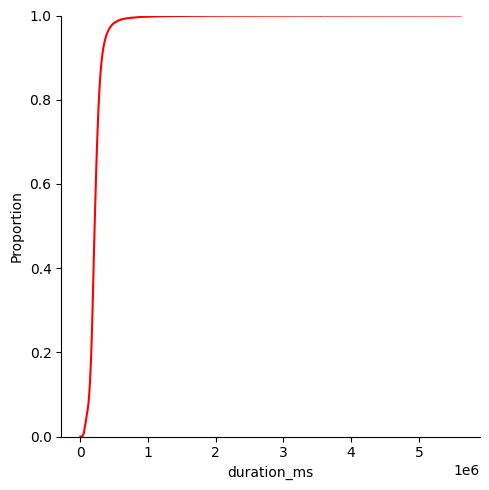

In [24]:
# Selección de gráfica según el objetivo
sns.displot(data=data_tracks, x="duration_ms", color="r", kind="ecdf")

<Axes: xlabel='duration_ms'>

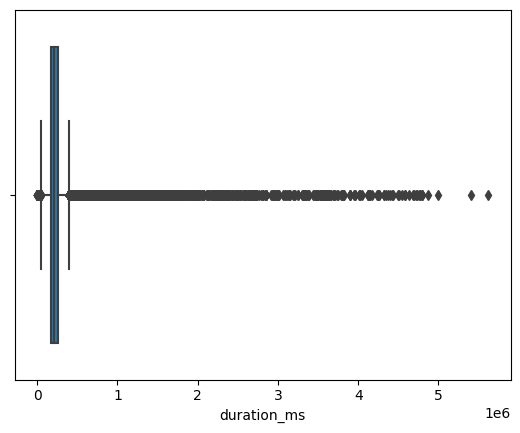

In [25]:
sns.boxplot(data=data_tracks, x="duration_ms")


In [26]:
data_borrar = data_tracks[data_tracks["artists"]=="['Various Artists']"]

In [27]:
df01 = data_tracks.iloc[586596:586600,:]

In [28]:
def number_artists(row, df):
    t1 = row["id_artists"]
    return len(df.loc[t1,:])

In [29]:
data_tracks["numArtists"]=data_tracks.apply(lambda row: number_artists(row, data_artists), axis=1)

KeyError: "None of [Index(['0ZXEk4WDiPwEkjG6pQ408i'], dtype='object', name='id')] are in the [index]"

In [ ]:
for k in range(0,len(data_tracks)-1):
    